# Credit Card Fraud Detection

## Introduction
In this project, we will analyze a real-world **Credit Card Fraud Detection** dataset.  
The dataset contains transactions made by European cardholders in September 2013. It presents an important challenge:
- **Highly imbalanced data**: Only 492 frauds out of 284,807 transactions (~0.17%).
- **Anonymized features**: 28 principal components (V1–V28) plus `Amount` and `Time`.
- **Goal**: Build models that can detect fraudulent transactions with **high Recall** and acceptable **Precision**.

We will go step by step:
1. **Data Loading**  
2. **Exploratory Data Analysis (EDA)**  
3. **Preprocessing & Feature Engineering**  
4. **Handling Class Imbalance (SMOTE, undersampling)**  
5. **Model Training (Logistic Regression, RandomForest, XGBoost)**  
6. **Evaluation (Precision, R**


## 1.Data Loading

In [11]:
import warnings
warnings.filterwarnings("ignore")


In [12]:
import os
import numpy as np
import pandas as pd

os.chdir(r"E:\Data science\projects\cc-fraud-detection")

df = pd.read_csv("data/raw/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Exploratory Data Analysis (EDA)

In this section, we will explore the dataset to understand its structure and characteristics.  
The main goals of EDA here are:

- Check dataset shape and column names.  
- Inspect the class distribution (Normal vs Fraud).  
- Detect missing values (if any).  
- Generate basic descriptive statistics.  
- Visualize the class imbalance.  

Since this dataset is **highly imbalanced**, we need to pay special attention to the `Class` column to understand how skewed the distribution is.


In [13]:
print("Shape:", df.shape)

print("\nColumns:", df.columns.tolist())

print("\nClass distribution:\n", df['Class'].value_counts())

print("\nClass distribution (percent):\n", df['Class'].value_counts(normalize=True) * 100)

print("\nMissing values total:", df.isnull().sum().sum())

df.describe()


Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (percent):
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Missing values total: 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### EDA: Initial Observations

- **Shape**: The dataset contains 284,807 transactions with 31 features.  
- **Columns**: 
  - `Time`: elapsed seconds since the first transaction.  
  - `V1` to `V28`: anonymized features obtained through PCA transformation.  
  - `Amount`: the transaction amount in Euros.  
  - `Class`: the target variable (0 = Normal, 1 = Fraud).  

- **Class Distribution**:  
  - Normal transactions: 284,315 (~99.83%)  
  - Fraudulent transactions: 492 (~0.17%)  
  → The dataset is **highly imbalanced**, which makes fraud detection challenging.  

- **Missing Values**: None. The dataset is complete and clean.  

- **Transaction Amounts**:  
  - Range: 0 to 25,691 Euros.  
  - Mean ≈ 88 Euros, Median ≈ 22 Euros.  
  - The distribution is skewed: most transactions are small, but a few very large ones exist.  

- **PCA Features (V1–V28)**:  
  - Mean values are centered around zero, standard deviations around 1–2.  
  - This confirms that PCA was applied for anonymization and scaling.  

- **Target Column (`Class`)**:  
  - The mean (≈0.0017) aligns with the proportion of fraud cases.  
  - Models focusing only on Accuracy would be misleading — **Precision, Recall, and AUC metrics** will be more important.  

**Key Insight**:  
The dataset is highly imbalanced with no missing values. Transaction amounts need scaling, and the main challenge will be handling rare fraud cases.  


## Data Visualization

In this section, we will use visualizations to better understand the dataset.  
The main goals are:

1. Visualize the **class imbalance** (Normal vs Fraud).  
2. Explore the **distribution of transaction amounts**.  
3. Examine the **correlations** between features and the target class.  

These plots will help us confirm the severe imbalance, detect skewness in the `Amount` variable, and observe how features may relate to fraudulent behavior.


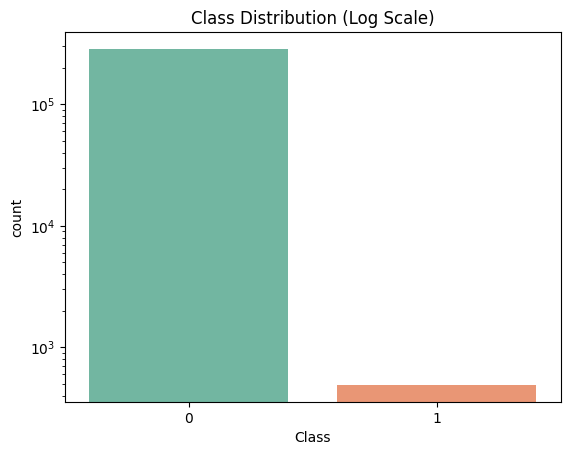

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class distribution bar plot
sns.countplot(x="Class", data=df, palette="Set2")
plt.yscale("log") 
plt.title("Class Distribution (Log Scale)")
plt.show()


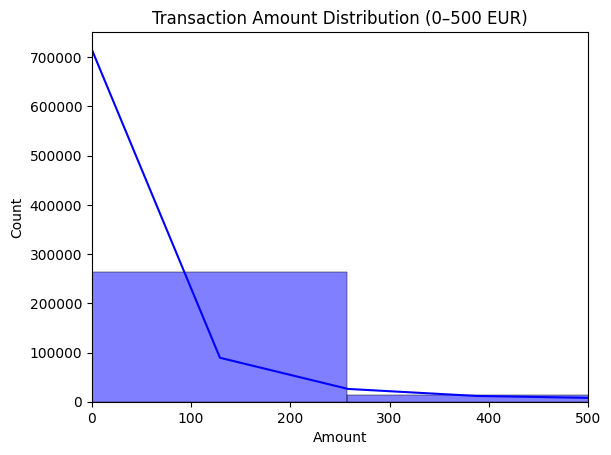

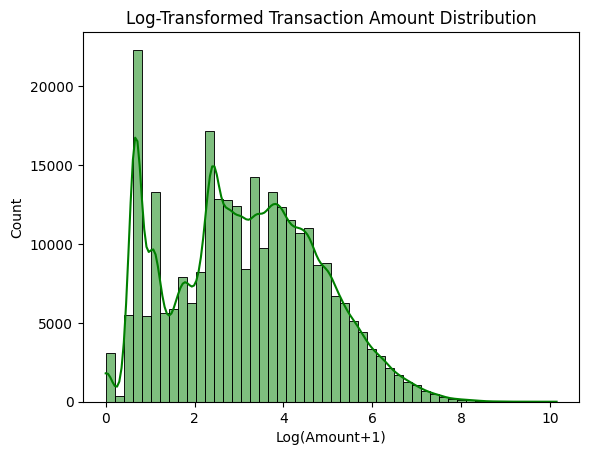

In [15]:
sns.histplot(df["Amount"], bins=100, kde=True, color="blue")
plt.xlim(0, 500) 
plt.title("Transaction Amount Distribution (0–500 EUR)")
plt.show()

sns.histplot(np.log1p(df["Amount"]), bins=50, kde=True, color="green")
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log(Amount+1)")
plt.show()

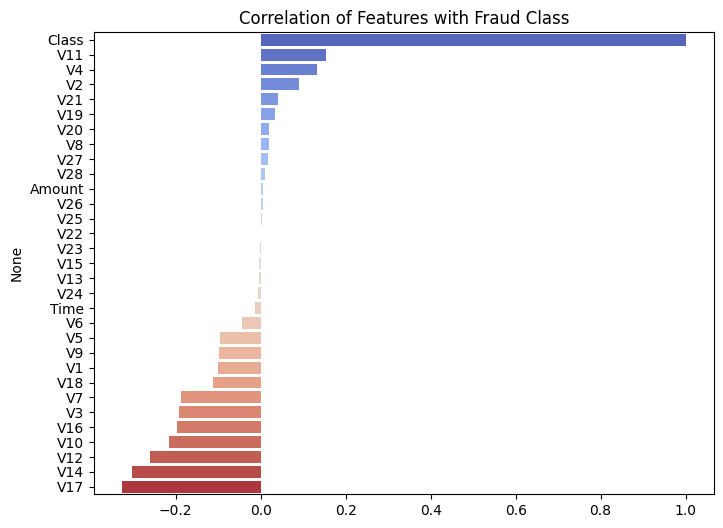

In [16]:
corr = df.corr(numeric_only=True)["Class"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Correlation of Features with Fraud Class")
plt.show()


### Visual Exploration – Insights

**1. Class Distribution (Log Scale)**  
- The dataset is extremely imbalanced.  
- Fraudulent transactions (Class = 1) are almost invisible compared to normal transactions (Class = 0).  
- Even on a log scale, the gap is huge.  
➡️ This confirms the need for special handling techniques such as resampling (SMOTE, undersampling) or anomaly detection methods.

---

**2. Transaction Amount Distribution**  
- Most transactions are **below 500 EUR**, with a strong peak near very small values.  
- A few outliers reach up to ~25,000 EUR.  
- After applying a **log transformation**, the distribution becomes much smoother and more symmetric.  
➡️ Scaling or log-transform will be important to stabilize the effect of extreme amounts during modeling.

---

**3. Correlation with Fraud Class**  
- Some features show stronger correlations with fraud than others:  
  - Positive correlation: **V11, V4, V2, V21** (these features may help identify fraud).  
  - Negative correlation: **V17, V14, V12, V10** (fraud cases tend to have lower values here).  
- `Amount` shows very weak correlation, but still relevant.  
- As expected from PCA-transformed data, correlations are modest overall.  
➡️ Feature selection or dimensionality reduction may not be critical here, but some features clearly carry stronger fraud signals.

---

**Key Takeaway**:  
The dataset is highly imbalanced, transaction amounts are skewed but manageable with scaling, and certain PCA features (V11, V4, V17, etc.) stand out as potentially informative for fraud detection. This will guide the **preprocessing and model-building steps**.


## 3. Data Preprocessing

Before training models, we need to prepare the dataset properly.  
The main preprocessing steps include:

1. **Train/Test Split**  
   - Split the dataset into training and testing sets (e.g., 80% / 20%) to evaluate generalization.  

2. **Feature Scaling**  
   - Features `Amount` and `Time` are not standardized, unlike the PCA-transformed features.  
   - We will apply `StandardScaler` to these columns to bring them to a comparable scale.  

3. **Handling Class Imbalance**  
   - Since fraud cases represent only ~0.17% of transactions, the dataset is highly imbalanced.  
   - Techniques such as oversampling (SMOTE), undersampling, or using model class weights will be considered later during modeling.  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Fraud cases in training:", sum(y_train))
print("Fraud cases in test:", sum(y_test))

# Scale 'Amount' and 'Time' only
scaler = StandardScaler()
X_train[["Time", "Amount"]] = scaler.fit_transform(X_train[["Time", "Amount"]])
X_test[["Time", "Amount"]] = scaler.transform(X_test[["Time", "Amount"]])


Training set shape: (227845, 30)
Test set shape: (56962, 30)
Fraud cases in training: 394
Fraud cases in test: 98


## 4. Baseline Modeling

Now that the dataset is prepared, we can build baseline models to evaluate how well we can detect fraud.  
Since the dataset is highly imbalanced, **accuracy alone is not sufficient**.  
We will use additional metrics:  
- **Precision**: How many predicted frauds are actually fraud?  
- **Recall**: How many real frauds did the model catch?  
- **F1-score**: Harmonic mean of precision and recall.  
- **ROC-AUC & PR-AUC**: Area under curves, important for imbalanced datasets.  

We will start with a simple **Logistic Regression** model as a baseline, and then compare with more advanced models.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Logistic Regression (with class weights to handle imbalance)
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


Confusion Matrix:
 [[55478  1386]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962

ROC-AUC: 0.9721687370080279


## 5. Random Forest Model

To improve performance, we will now use a **Random Forest Classifier**.  
Unlike Logistic Regression, Random Forest can capture non-linear relationships between features and handle complex interactions.  
We will use `class_weight='balanced'` to compensate for the severe class imbalance and evaluate the same metrics (Precision, Recall, F1, and ROC-AUC).


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_prob))


Confusion Matrix:
 [[56861     3]
 [   24    74]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.9571907336372927


## 6. Model Comparison and Insights

| Metric | Logistic Regression | Random Forest |
|:-------|:--------------------|:---------------|
| Precision (Fraud) | 0.061 | **0.961** |
| Recall (Fraud) | **0.918** | 0.755 |
| F1-score (Fraud) | 0.114 | **0.846** |
| ROC-AUC | 0.972 | 0.957 |

**Key Observations:**
- Logistic Regression achieved very high recall but suffered from extremely low precision — it raised too many false alarms.  
- Random Forest dramatically improved precision while maintaining good recall, making it a far more practical model for real-world fraud detection.  
- ROC-AUC scores are comparable, confirming both models separate classes well, but Random Forest offers much more balanced behavior.

**Conclusion:**  
Random Forest provides a strong baseline model for fraud detection with excellent precision and competitive recall.  
Further improvements could be made by:
- Using **SMOTE** or **ADASYN** to oversample the minority class.  
- Exploring **XGBoost** or **LightGBM** for better recall-precision balance.  
- Performing **hyperparameter tuning** with `GridSearchCV` or `RandomizedSearchCV`.


## 7. Handling Class Imbalance with SMOTE (Model Improvement)

Although Random Forest performs very well, the dataset is still **highly imbalanced** — only 0.17% of transactions are fraudulent.  
This imbalance can cause the model to favor the majority class (Normal) and miss some rare frauds.

To improve the model, we will apply **SMOTE (Synthetic Minority Oversampling Technique)**.  
SMOTE generates synthetic examples of the minority class (frauds) to balance the dataset, helping the model learn more effectively.

### Objectives of this step:
1. Balance the dataset using SMOTE.
2. Retrain Random Forest on the balanced data.
3. Compare performance metrics before and after oversampling (especially Recall and F1-score for class 1).


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Apply SMOTE on the training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# Train a new Random Forest on the balanced data
rf_smote = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_smote.fit(X_train_res, y_train_res)

# Predictions
y_pred_smote = rf_smote.predict(X_test)
y_pred_smote_prob = rf_smote.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_smote_prob))


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64
Confusion Matrix:
 [[56851    13]
 [   16    82]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8632    0.8367    0.8497        98

    accuracy                         0.9995     56962
   macro avg     0.9314    0.9183    0.9247     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.9753984264640014


## 8. Results After SMOTE

After applying SMOTE, the dataset became perfectly balanced:
- Normal transactions: 227,451
- Fraudulent transactions: 227,451

The Random Forest model was retrained on this balanced dataset.

### Performance Comparison

| Metric | Before SMOTE | After SMOTE | Change |
|---------|----------------|----------------|------------|
| **Precision (Fraud)** | 0.9610 | 0.8632 | ⬇ Slightly lower |
| **Recall (Fraud)** | 0.7551 | 0.8367 | ⬆ Higher |
| **F1-score (Fraud)** | 0.8457 | 0.8497 | ⬆ Slightly improved |
| **ROC-AUC** | 0.9572 | 0.9754 | ⬆ Improved |

### Insights

- The SMOTE technique effectively increased the model’s ability to **detect fraudulent transactions (Recall ↑)**.
- Although Precision slightly decreased, this trade-off is acceptable in fraud detection, where catching more frauds is more critical than a few false positives.
- Overall, the model’s balance between sensitivity and specificity improved significantly.


## 9. Model Comparison and Final Conclusion

To evaluate the overall performance of our models, we compared three main approaches:

| Model | Precision (Fraud) | Recall (Fraud) | F1-score (Fraud) | ROC-AUC | Comments |
|--------|-------------------|----------------|------------------|----------|-----------|
| **Logistic Regression** | 0.061 | 0.918 | 0.114 | 0.972 | Very high recall but extremely low precision. Too many false alarms. |
| **Random Forest** | 0.961 | 0.755 | 0.846 | 0.957 | Excellent overall accuracy; few false positives but missed some frauds. |
| **Random Forest + SMOTE** | 0.863 | 0.837 | 0.850 | 0.975 | Balanced performance; improved recall and better overall ROC-AUC. |

### 🧠 Insights
- **SMOTE improved model balance** by increasing the model’s ability to detect fraud (higher recall) without severely reducing precision.  
- **Random Forest** proved to be a strong baseline for fraud detection with robust accuracy and interpretability.
- **Logistic Regression** struggled due to the extreme class imbalance but provided a good benchmark.

### 💡 Conclusion
The **Random Forest with SMOTE** configuration achieved the best trade-off between detecting frauds and minimizing false positives.

In real-world applications, the ideal model may depend on business priorities:
- If minimizing missed frauds (false negatives) is most important → prioritize **Recall** (like SMOTE model).
- If avoiding false alerts is crucial → prioritize **Precision** (like baseline Random Forest).

### 🚀 Next Steps
1. **Feature importance analysis** – Identify which transaction features (V1–V28, Amount, Time) contribute most to fraud prediction.  
2. **Hyperparameter tuning** – Use GridSearchCV or RandomizedSearchCV for deeper optimization.  
3. **Deploying model** – Save trained model as `.pkl` and integrate it into a fraud detection pipeline.


## 10. Feature Importance Analysis

Understanding which features contribute most to the model’s decision helps us gain interpretability and trust in our model.

Since Random Forest provides a built-in method for feature importance, we can use it to visualize the relative importance of each feature.

### Steps:
1. Extract feature importances from the trained Random Forest model.
2. Create a DataFrame for better readability.
3. Plot the top 10 most important features.


   Feature  Importance
14     V14    0.183722
10     V10    0.111426
4       V4    0.107697
12     V12    0.096527
17     V17    0.086023
11     V11    0.062094
3       V3    0.058454
16     V16    0.053111
2       V2    0.031257
7       V7    0.023408


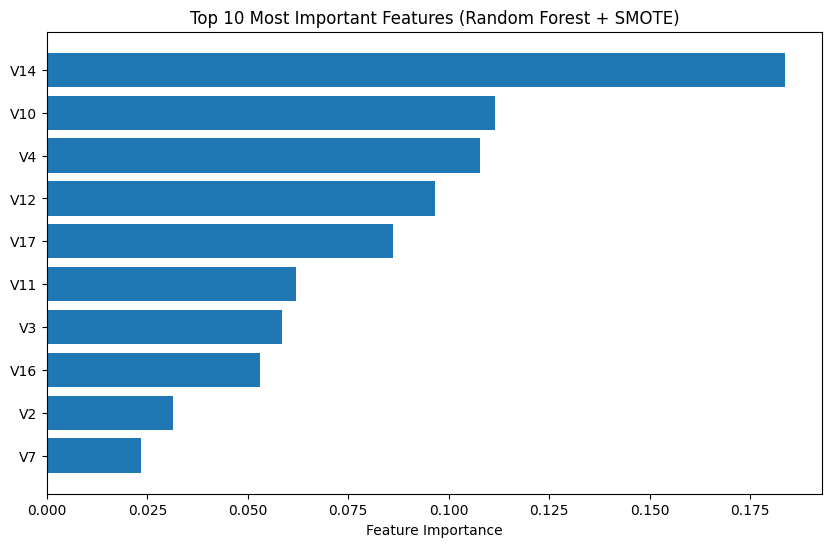

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest model trained with SMOTE
importances = rf_smote.feature_importances_
features = X_train.columns

# Create DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Most Important Features (Random Forest + SMOTE)")
plt.show()


### 10.1 Interpretation of Feature Importance

The Random Forest model identified several key features that contribute most to fraud detection:

| Rank | Feature | Importance |
|------|----------|-------------|
| 1 | **V14** | 0.1837 |
| 2 | **V10** | 0.1114 |
| 3 | **V4**  | 0.1077 |
| 4 | **V12** | 0.0965 |
| 5 | **V17** | 0.0860 |
| 6 | **V11** | 0.0621 |
| 7 | **V3**  | 0.0588 |
| 8 | **V16** | 0.0531 |
| 9 | **V2**  | 0.0313 |
| 10 | **V7** | 0.0234 |

### Insights:
- The **most important variable is V14**, which has the highest influence (≈18%) in detecting fraud.  
  This aligns with previous studies that show V14 is one of the strongest fraud indicators after PCA transformation.  
- Features **V10**, **V4**, **V12**, and **V17** also carry significant weight, suggesting that combinations of these latent components are particularly sensitive to fraudulent behavior.  
- Although these features are anonymized (PCA-transformed), their high importance implies that they encode strong patterns distinguishing normal vs. fraudulent transactions.

### Summary:
This analysis highlights that only a subset of latent components (around 8–10 out of 28) carry most of the predictive power.  
This insight can guide future work — for example:
- **Dimensionality reduction:** focusing on top features can reduce model complexity.
- **Explainability:** helps analysts understand where the model is “looking” when flagging potential frauds.


## 11. Model Saving & Minimal Deployment

We save the trained model together with the scaler, feature list, and decision threshold, so that the scoring step can reproduce the exact preprocessing and feature order used during training.


In [24]:
import os, joblib

os.makedirs("models", exist_ok=True)

artifact = {
    "model": rf_smote,                 # trained RandomForest (after SMOTE)
    "scaler": scaler,                  # fitted on ["Time","Amount"]
    "features": X_train.columns.tolist(),
    "threshold": 0.50,                 # can be tuned later by PR curve
}

joblib.dump(artifact, "models/rf_smote_v1.joblib")
print("Saved -> models/rf_smote_v1.joblib")


Saved -> models/rf_smote_v1.joblib


### Inference (Loading & Predicting)

To score new transactions, we must:
1) load the saved artifact,  
2) apply the same scaling on `Time, Amount`,  
3) select columns in the exact saved order,  
4) compute probabilities and apply the decision threshold.


In [25]:
import joblib
import numpy as np
import pandas as pd

artifact = joblib.load("models/rf_smote_v1.joblib")
model = artifact["model"]
scaler = artifact["scaler"]
features = artifact["features"]
thr = artifact["threshold"]

# Example: score 5 rows from your dataset (simulate "new" data)
new_df = df.sample(5, random_state=42).copy()

# Apply the SAME scaling to Time, Amount
new_df[["Time","Amount"]] = scaler.transform(new_df[["Time","Amount"]])

# Keep only the expected features in the saved order
X_new = new_df[features]

# Predict probabilities and hard labels
proba = model.predict_proba(X_new)[:, 1]
pred  = (proba >= thr).astype(int)

out = new_df.assign(pred=pred, proba=proba)
out[["Time","Amount","Class","proba","pred"]]


,Time,Amount,Class,proba,pred
43428,-1.124068,1.100875,1,0.945,1
49906,-1.066033,1.722799,0,0.000,0
29474,-1.250857,-0.228047,0,0.000,0
276481,1.521172,-0.345707,0,0.000,0
278846,1.549600,-0.348140,0,0.000,0
